## Convolutional Neural Network

### CNN: Convolutional Neural Network 
#### To train on the mnist dataset. 
#### Implement Deep CNN
#### Optimize CNN


#### CNN was designed based on similar structure as Visual Cortex of the brain where image processing happens. 
#### On earch, millions of years ago, evolutions sped up because creatures developed the sense of vision.  When prey developed the vision, it became cognizant of the surrounding and was able to evade the predator.  Similarly, predator became congnizant of surrounding environments and was able to catch the prey.  Australian zoologist wrote "Blink of an eye".

#### Yann LeCun, professor of Computer Science at New York University in 1995 introduced the concept of Convolutional Neural Network in 1995. 
#### 

### The Core Idea Behind CNN

#### 1. Local Connections: Represents how each set of neuron in a cluster is connected to each other, which in turn represents a set of features. 
#### 2. Layering: Represents the hierarchy in features that are learned. First layer detects the edges, second layer creates smaller part of the features, and third layer creates the faces. 
#### 3. Spatial Invariance: Represnts the capability of CNN to learn abstractions invariance of size, contrast, rotation, and variation. 

#### Few Popular CNN
#### ImageNet Large Scale Visual Recognition Challenge Winnders
#### LeNet, AlexNet, VGGNet, ResNet


### Learning an Image
#### 
#### CNN Focuses on smaller and specific patters than the whole image. 
#### It's convenient and effective to represent a smaller region with fewer parameters, thereby reducing computational complexity.
#### 
#### Input -> Convolutional -> Pooling -> Dense -> Output

#### Kernet/Filter element value is multiplied from the top, summed up, and then relu is applied which is max of (computed value, 0). 
#### Kernel values are derived during the training process or learned by the neural network which are training parameters. (Xavier Distribution)
#### Then it moves horizontally to repeat the same computation. 
#### Once it cannot move horizontally then it moves down vertically to repeat the same computation.
#### This is the fundamental idea of convolution operation. 
#### 
#### Maxpool (2x2) /Down Sampling
#### Another option is Average Pooling
#### 
#### Flatten (converting 2x2 to 4 rows x 1 column ) 
#### 
#### Fully Connected/Dense Layer
#### 
#### Output Layer
#### 
#### Convolutional -> Maxpool -> Flatten -> Fully Connected/Dense Layer -> Output Layer

#### n = dimension of image = 6
#### f = dimension of filter = 3
#### dimension convolution = n-f + 1 = 4
#### dimension maxpool = 2
#### with padding, n+2p-f+1 = 6
#### 
#### Padding Layer: Padding is nothing but add 0 all around the image then it is called padding. So, a 6x6 image becomes 8x8. 
#### Essentially valid 
#### Valid => No padding 
#### Same => Padding; 
#### If the image is nxn and then padding is same then the output metrics is same as nxn metrics.  

### RGB Images
#### Image is itself stored in 3x3 dimension
#### 1. Red Channel 
#### 2. Green Channel
#### 3. Blue Channel
#### 
#### 

## Convolutional Neural Network - MNIST Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [31]:
from tensorflow.keras.datasets import mnist

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

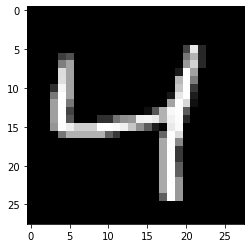

In [35]:
plt.imshow(X_train[2], cmap='gray')

In [36]:
y_train[2]

4

In [37]:
# Scaled image since it is gray image (one color image) 
X_train = X_train.reshape(60000, 28, 28, 1)
X_test  = X_test.reshape(10000, 28, 28, 1)

In [38]:
print(f" Training Shape {X_train.shape} Test Shape {X_test.shape}")

 Training Shape (60000, 28, 28, 1) Test Shape (10000, 28, 28, 1)


In [39]:
X_train = X_train/255.0
X_test  = X_test/255.0

In [1]:
# Import Sequential model and import layer items
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [41]:
# Create model
model = Sequential()

In [42]:
# Convolutional Layer with 32 filters, 3*3 filter size, stride=1, and no padding
model.add(Conv2D(32, 
                 kernel_size=3, 
                 activation='relu', 
                 padding='valid', 
                 input_shape=(28,28,1)
                )
         )

In [43]:
model.add(MaxPool2D(pool_size=2)) # MaxPool2D

In [44]:
model.add(Flatten()) # Flatten

In [45]:
model.add(Dense(64, activation = 'relu')) # Fully Connected Layer

In [46]:
model.add(Dense(10, activation = 'softmax')) # Output Layer

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

#### Conv2D Parameter is 320 because Kernel/Filter size is 3x3 which has 9 elements. 9 elements +1 bias = 10.  10*32 filters = 320
#### n-f+1 with no padding, n here is 28, 3 is filter size, so 28-3+1 = 26 for each image, 32 is filter. 
#### Pooling size is 2, therefore, 26/2 = 13
#### 13*13*32 = 5408 
#### (5408+1)*63 = 340767

In [48]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [49]:
model.fit(X_train, 
          y_train,
          validation_data=(X_test, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1845 - accuracy: 0.9459 - val_loss: 0.0719 - val_accuracy: 0.9776
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0576 - val_accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0578 - val_accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0446 - val_accuracy: 0.9845
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0473 - val_accuracy: 0.9858


In [50]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
print('Confusion Matrix')
print(confusion_matrix(y_pred=y_train_pred, y_true=y_train))
print('\n')
print(accuracy_score(y_pred=y_train_pred, y_true=y_train))

Confusion Matrix
[[5904    0    4    0    0    0    1    0   10    4]
 [   0 6695   25    2    0    1    4    7    1    7]
 [   0    0 5952    0    2    0    0    0    3    1]
 [   0    0   22 6079    0    1    0    0   23    6]
 [   0    1    1    0 5782    0    4    1    8   45]
 [   2    0    2    4    0 5377   11    0   23    2]
 [   3    0    1    0    2    1 5907    0    4    0]
 [   1    4   16    3    2    0    0 6199    3   37]
 [   0    1    1    0    0    0    0    0 5844    5]
 [   0    0    1    2    1    0    0    1    8 5936]]


0.9945833333333334


In [60]:
print('Confusion Matrix')
print(confusion_matrix(y_pred=y_test_pred, y_true=y_test))
print('\n')
print(accuracy_score(y_pred=y_test_pred, y_true=y_test))

Confusion Matrix
[[ 973    0    2    0    0    0    1    0    3    1]
 [   0 1125    4    0    0    0    3    1    1    1]
 [   0    0 1021    0    1    0    1    4    4    1]
 [   0    0    3  998    0    3    0    0    6    0]
 [   0    0    1    0  962    0    0    0    2   17]
 [   2    0    1    5    0  880    3    0    1    0]
 [   4    2    1    0    2    2  945    0    2    0]
 [   0    3   14    2    0    0    0  994    2   13]
 [   2    0    2    0    0    1    0    2  963    4]
 [   1    0    1    1    1    5    0    0    3  997]]


0.9858


##
##
##
## Transfer Learning
##

#### MobileNetV2 
#### Transfer the convolution and pool layer, then add the output layer. 
#### Transfer the architecture along with the weights and then add output layer or add dense layer and output layer. 
####
#### Advantage: 
#### 1. These are superior architecture, so transferring the architecture is optimal. 
#### 2. 